In [1]:
# Evaluation Projects
# Name : Sayyed Mudassar Iqbal Shakil Ahmed
# Batch : DSG2404
# Subject : Baseball Evaluation Project 1 Solution

# IMPORTING LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# LOADING DATASET

In [3]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The dataset contains 16 features 
and one TARGET named number of predicted wins "W"

In [4]:
# Checking Columns Datatype
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

The abbrevations are very confusing as I am not a regular baseball watcher. Hence converting names as per problem statement understanding.

In [5]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

We can observe that this dataset consists solely of numerical data, with no categorical columns present. Hence, it is suitable for REGRESSION ANALYSIS

# EXPLORATORY DATA ANALYSIS (EDA)

<Axes: >

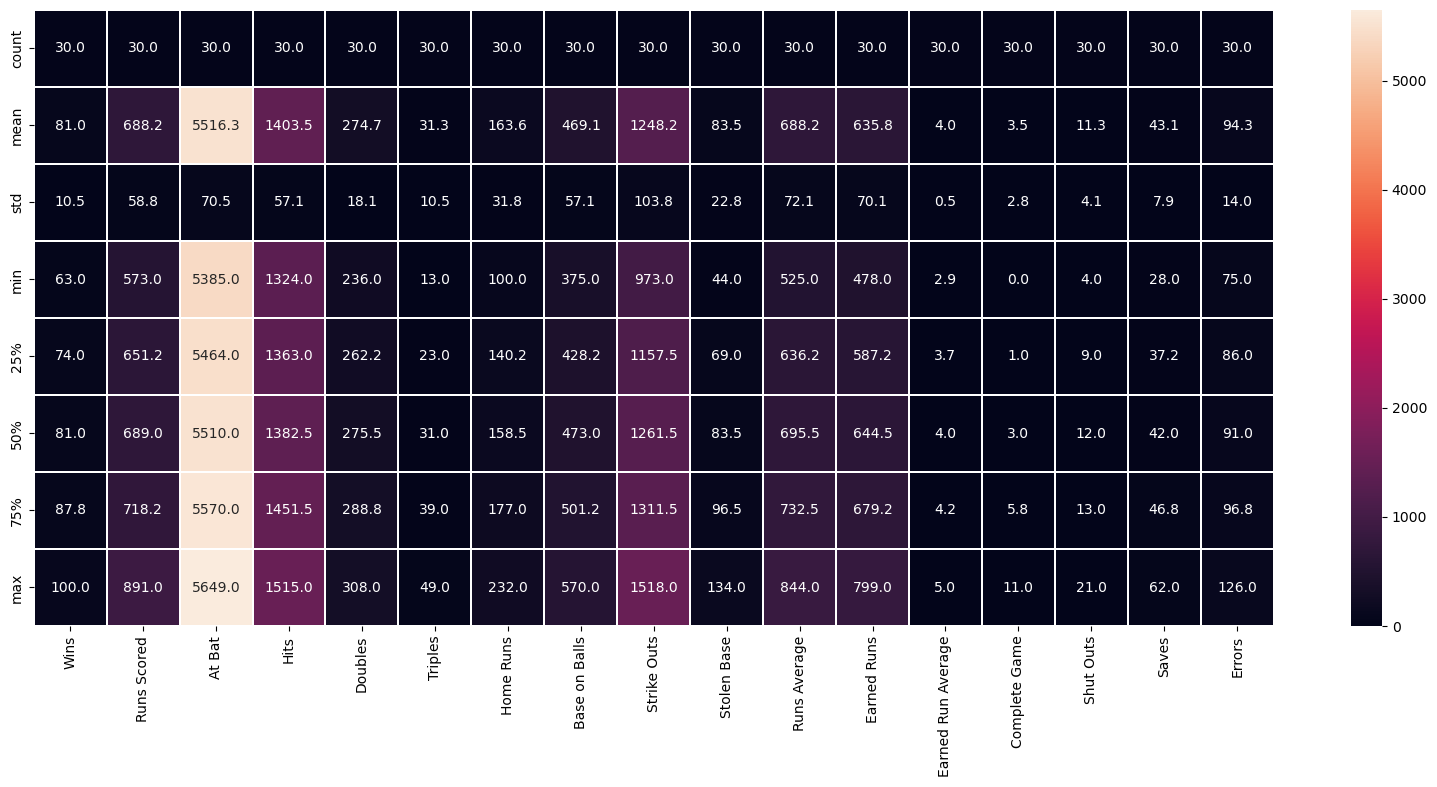

In [7]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


#### Finding
By examining the mean and 50th percentile for various features, we can observe that the data is slightly right-skewed for most of the variables.
1) The count remains consistent across all features.
2) The 75th percentile and maximum values for Errors, Shutout, and Run Scored suggest the presence of potential outliers.
3) Overall, statistical parameters from the mean to the maximum indicate that the features follow a consistent pattern with no significant anomalies.
4) The heatmap clearly highlights the need for data scaling when building an ML model.

# Checking for missing values

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                    Missing Values  % Missing data
Wins                             0             0.0
Stolen Base                      0             0.0
Saves                            0             0.0
Shut Outs                        0             0.0
Complete Game                    0             0.0
Earned Run Average               0             0.0
Earned Runs                      0             0.0
Runs Average                     0             0.0
Strike Outs                      0             0.0
Runs Scored                      0             0.0
Base on Balls                    0             0.0
Home Runs                        0             0.0
Triples                          0             0.0
Doubles                          0             0.0
Hits                             0             0.0
At Bat                           0             0.0
Errors                           0             0.0


There are no missing values in our data

# Feature Distribution 

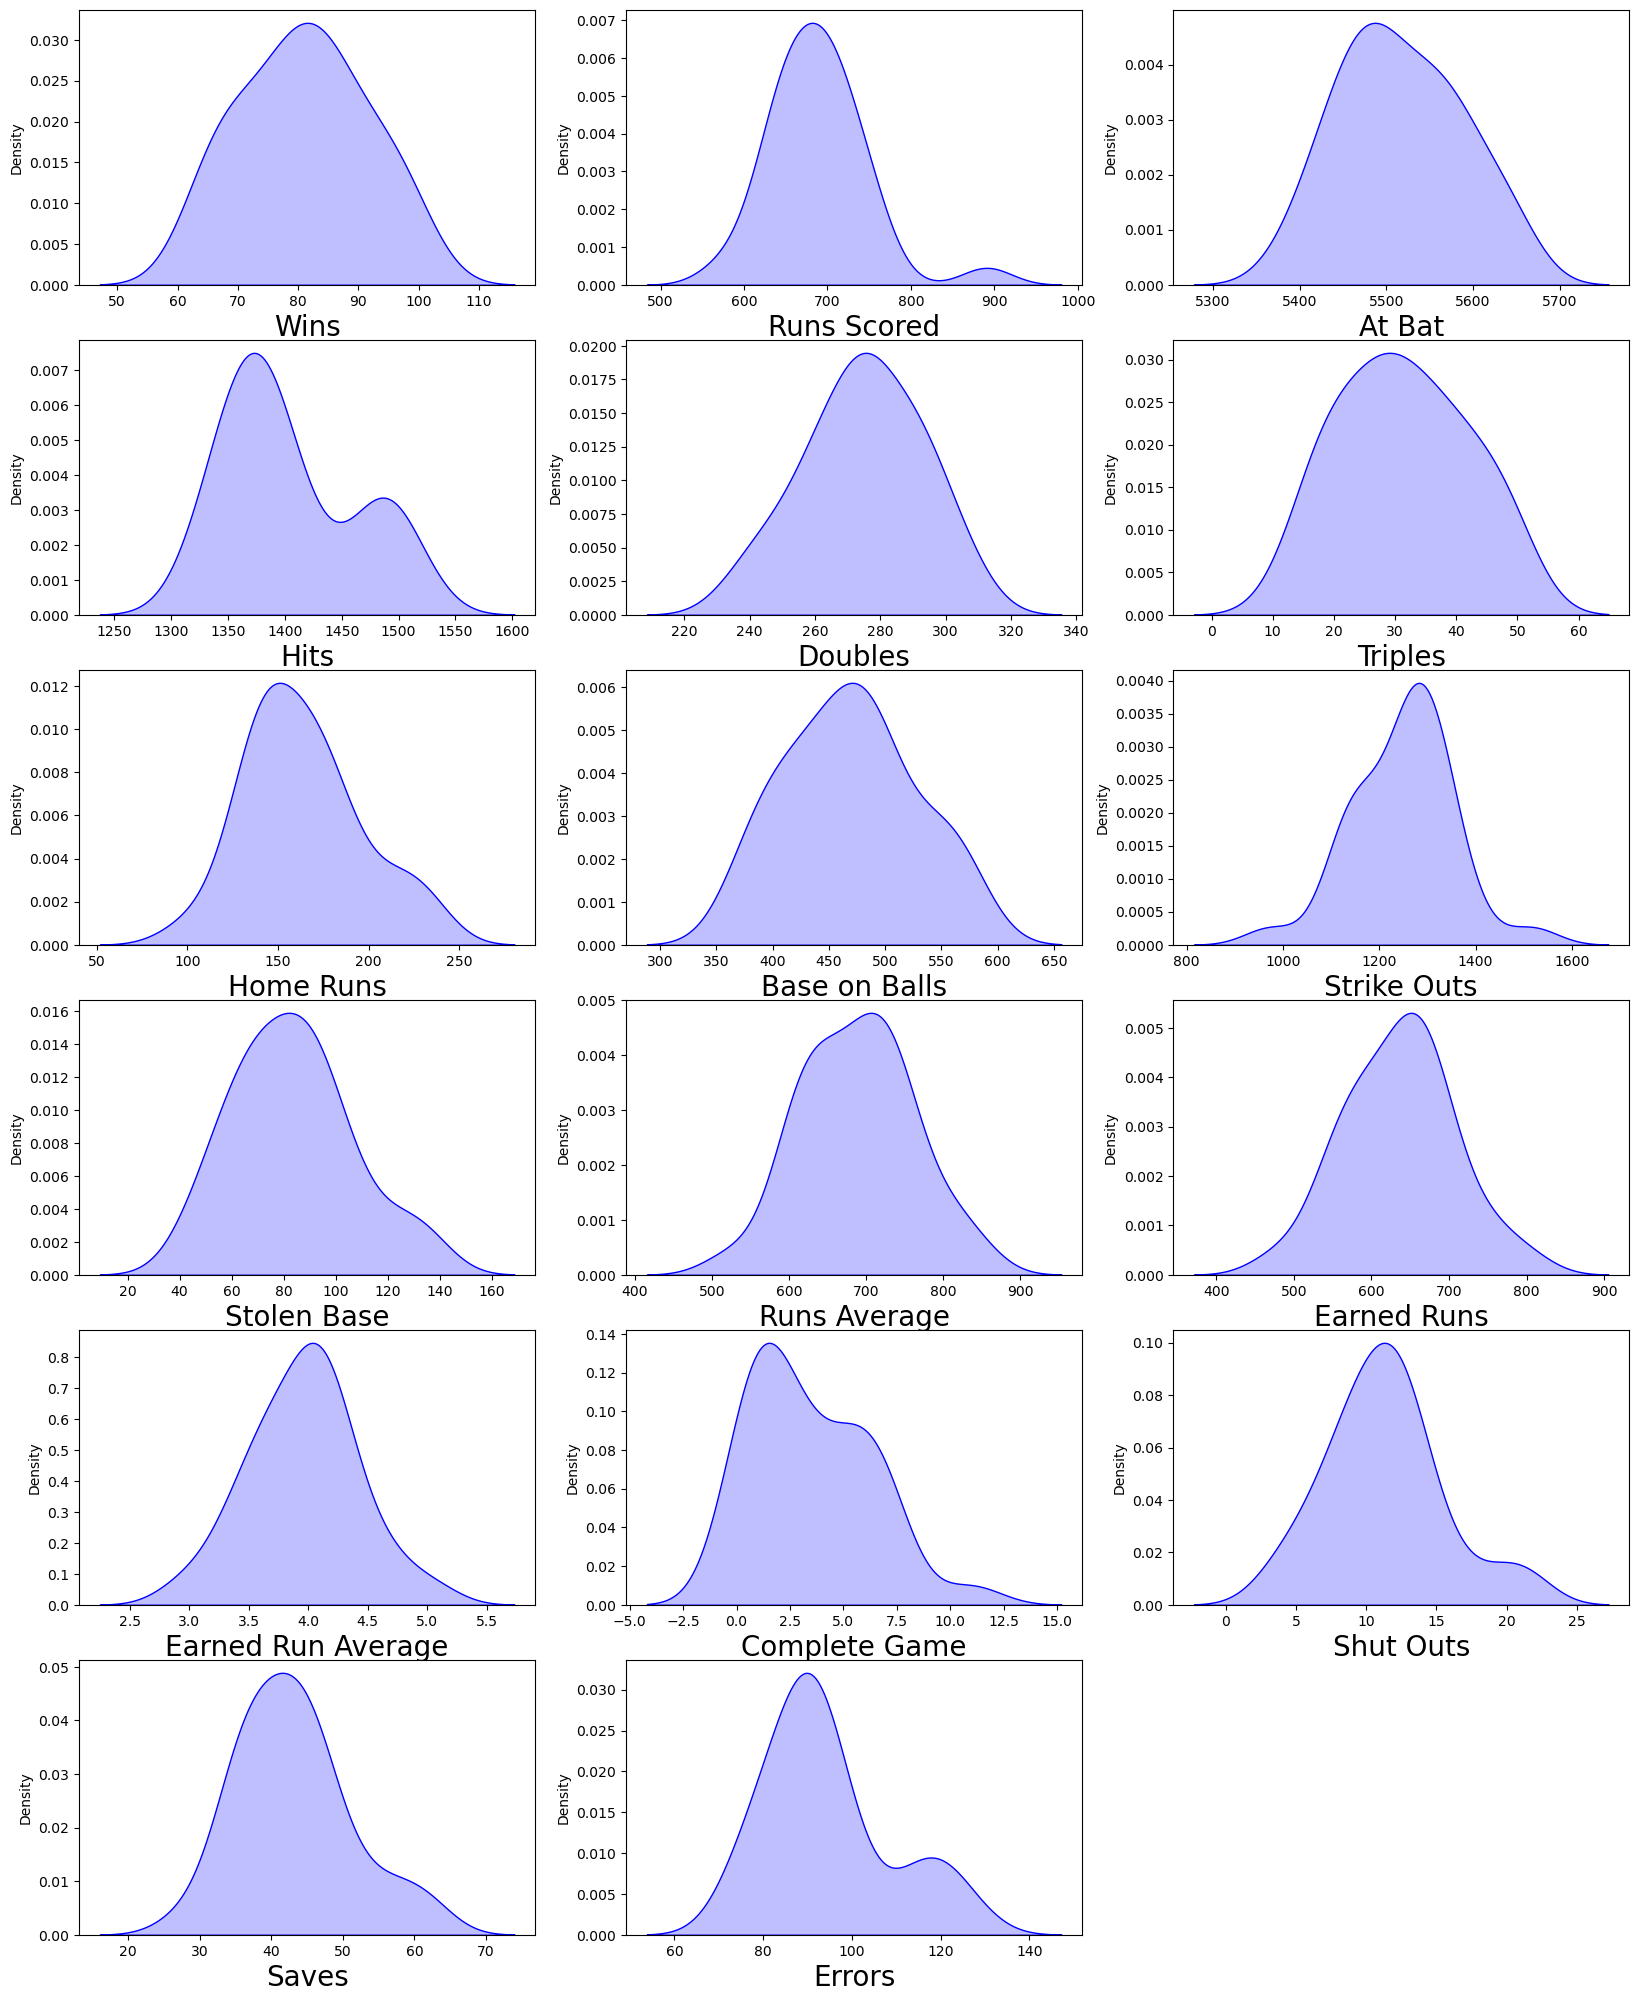

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='b',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

It is evident that some features exhibit either left or right skewness.

# Outliers Detection and Removal

In [11]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [12]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (29, 17)


In [13]:
# check data loss
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((30-29)/30)*100,'%')

Percentage Data Loss : 3.3333333333333335 %


# Feature selection and Engineering

In [14]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

The optimal range for skewness is between -0.5 and 0.5. Features like Hits, Complete Game, Shutouts, Saves, and Errors exhibit positive skewness and will require transformation.

### Transforming right skewed data using BoxCox

In [16]:
from scipy.stats import boxcox
df1['Hits']=boxcox(df1['Hits'],-2)
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)
df1['Saves']=boxcox(df1['Saves'],0.5)

Other features could not be transformed using the Boxcox method due to the requirement that the data must be positive. Therefore, the remaining columns were transformed using the Yeo-Johnson method.

In [17]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [18]:
EC=['Errors','Complete Game']
ds =df1[EC].copy()

In [19]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   
new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [20]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[EC]=dataset[EC]

#### Now lets check for skewness after transformation

In [21]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

All features skewness are now transformed within permissible limit of -0.5 to 0.5

## Check for Correlation

In [22]:
df1.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base on Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike Outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen Base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


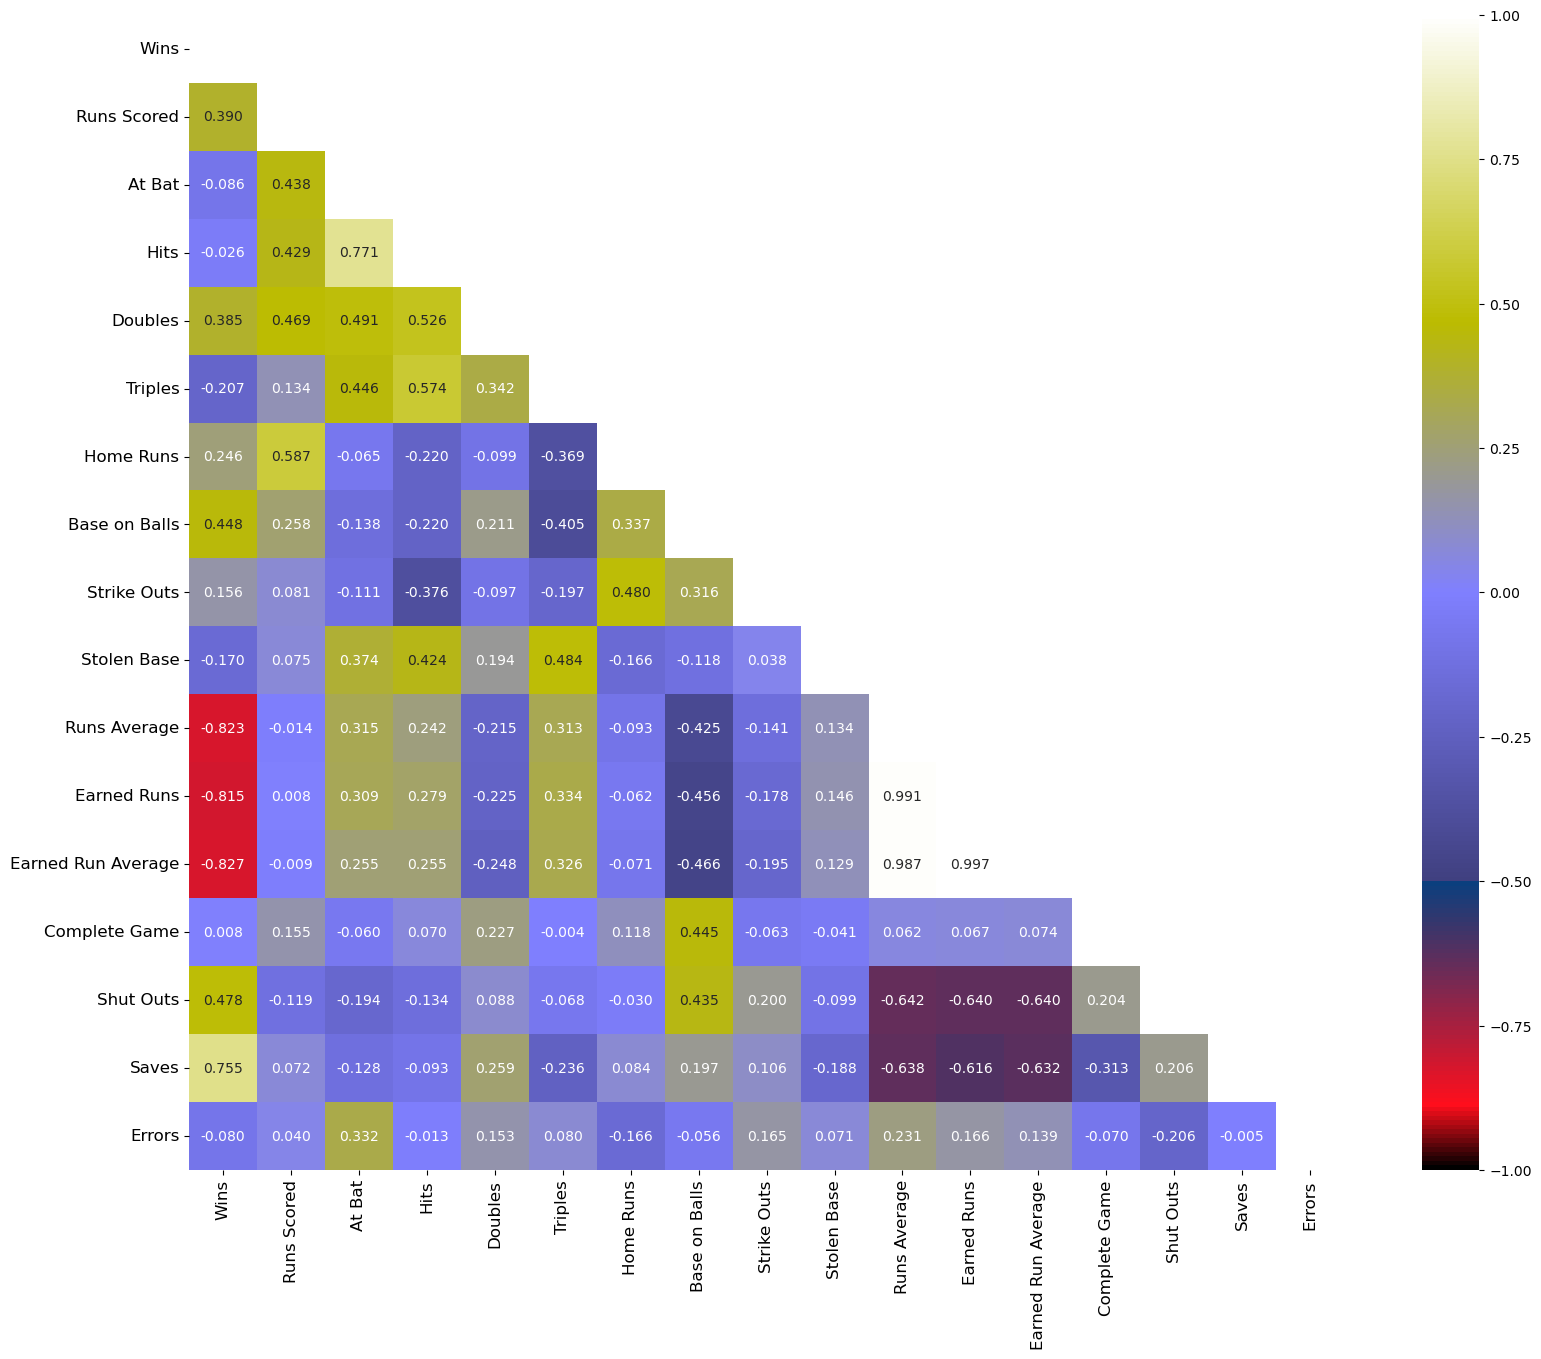

In [23]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

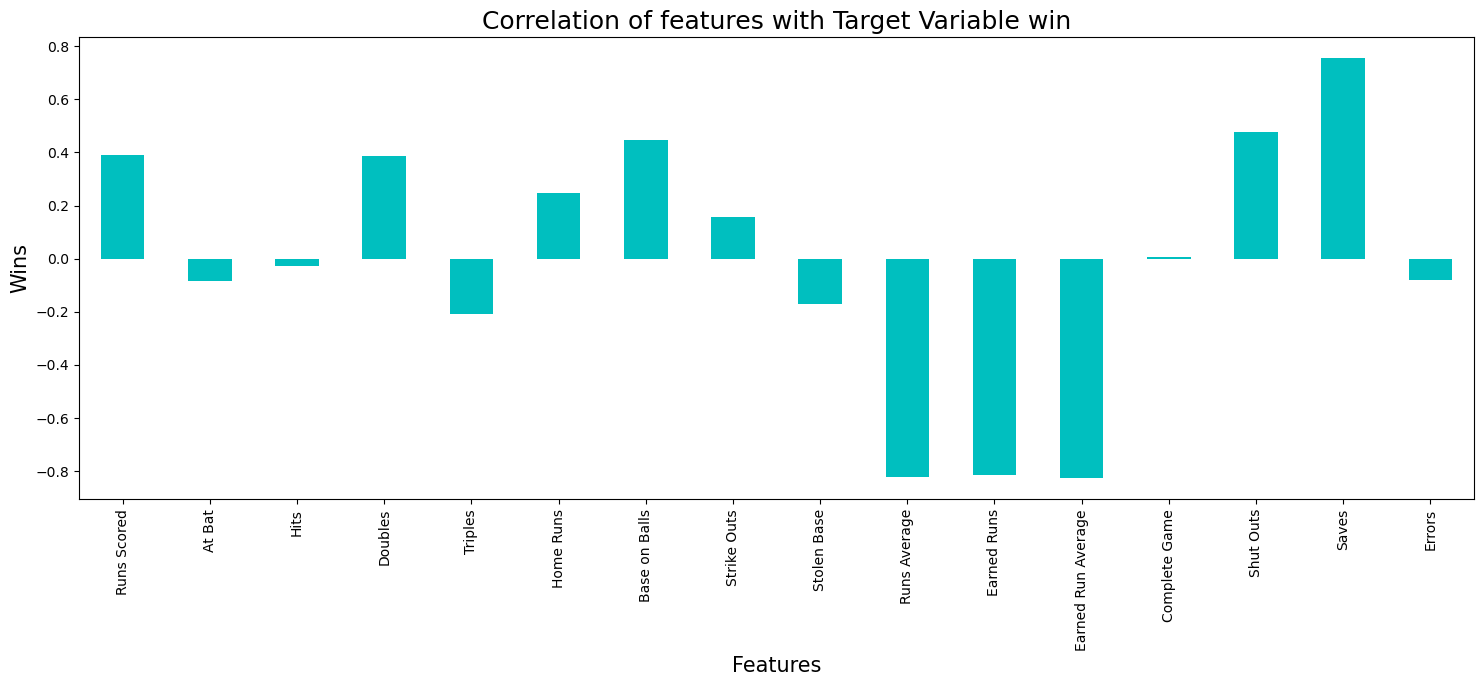

In [24]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

#### Finding:
   - Hits, At Bats, Complete Game, and Errors show very weak correlation with the target variable.
   - Saves, ERA, RA, and EA are highly correlated with the target variable.
   - There is evident multicollinearity between the features "Earned Runs," "Earned Run Average," and "Runs Average," which needs further investigation.

 This multicollinearity should be examined using the Variance Inflation Factor (VIF) or addressed through the application of PCA (Principal Component Analysis)

#### Checking Multicollinearity between features using variance_inflation_factor

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

,VIF,Features
0,1164.543214,Wins
1,3253.807721,Runs Scored
2,5181.779465,At Bat
3,4817.334228,Hits
4,1157.105781,Doubles
5,32.435486,Triples
6,309.301103,Home Runs
7,302.099558,Base on Balls
8,400.292880,Strike Outs
9,28.665516,Stolen Base


#### Finding:
<b>It is expected to observe high multicollinearity due to the following reasons:</b>  
1. Earned Run Average, Earned Runs, and Runs Average are strongly correlated with one another.  
2. At Bat and Hits have a correlation of 0.771 between themselves, but both show a very weak correlation with the target variable.  
3. <b>An additional critical factor is that the data has not been scaled yet, which is likely contributing to this issue.</b>

#### Strategy to Address Multicollinearity:
1. Removing highly correlated features is an option, but it may not be effective here as most input features are either moderately or poorly correlated with each other.
2. Another approach is to scale the data and then apply PCA to handle multicollinearity.

<b>We will proceed with the second approach for further analysis.</b>

# Standard Scaling

In [32]:
X=df1.drop(columns =['Wins'])
Y=df1['Wins']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# PCA

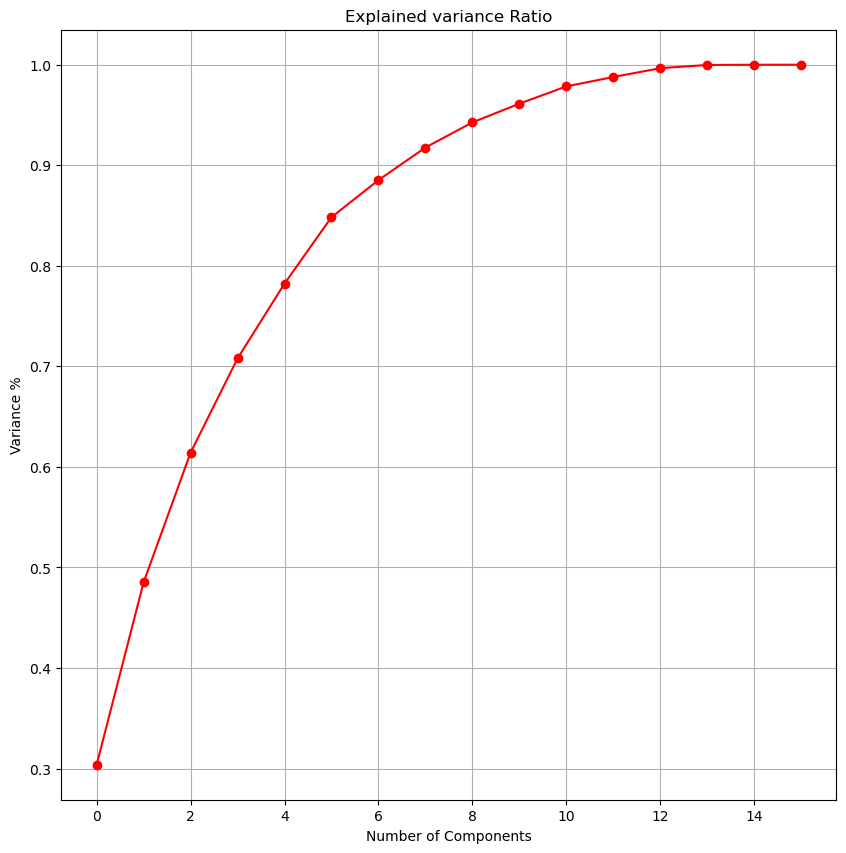

In [34]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Finding:
<b>Based on the graph, we observe that the first 7 principal components account for 95% of the variation in the data. Therefore, we will select these 7 components for our prediction.</b>

In [36]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(X_scale)

In [37]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

#### Checking Multicollinearity after applying PCA

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


Multicollinearity is solved

# MODEL BUILDING

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (20, 7)
Training target vector size: (20,)
Test feature matrix size: (9, 7)
Test target vector size: (9,)


#### Finding Best Random rate

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9179738330851042 on Random_state 217


## Linear Regression : Base model

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [84.58605088 96.26198656 82.50274504 63.77883574 88.03714446 70.54986049
 82.43803368 72.96772225]


Actual Wins:
 2     81
15    98
26    79
23    63
5     87
4     74
6     81
17    68
Name: Wins, dtype: int64


## Linear Regression Evaluation Matrix

In [43]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 2.5623356267648205
Mean squared error : 8.560199512884212
Root Mean Squared Error: 2.925781863516864


 R2 Score :
0.9179738330851042


### Cross validation

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
score = cross_val_score(lin_reg, principle_x, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.3354655028709037


 True Values Vs Predicted Value plot :


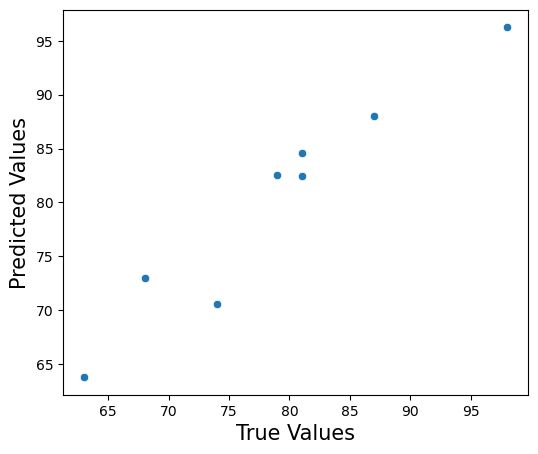

In [50]:
plt.figure(figsize=(6, 5))
y_pred = lin_reg.predict(X_test)

# Scatter plot instead of swarmplot
sns.scatterplot(x=Y_test.round(1), y=y_pred)

print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.show()


### Finding best n_neighbors for KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.246211251235321
RMSE value for k=  2 is: 6.267475568360838
RMSE value for k=  3 is: 6.1553951042064625
RMSE value for k=  4 is: 5.050525962709231
RMSE value for k=  5 is: 5.566866263886713
RMSE value for k=  6 is: 5.9956581512513445
RMSE value for k=  7 is: 5.569367750728727
RMSE value for k=  8 is: 5.896900668995536
RMSE value for k=  9 is: 6.370868305259728
RMSE value for k=  10 is: 6.42008566921034


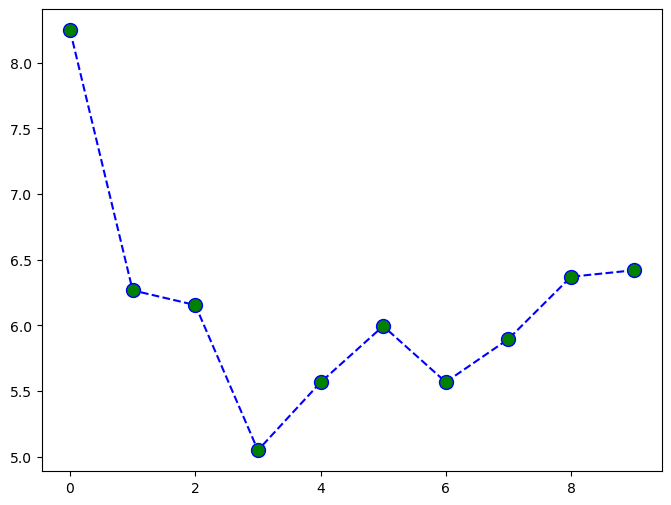

In [52]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k= 4, we get the minimum RMSE value which approximately 5.050525962709231, and shoots up on further increasing the k value. We can safely say that k=4 will give us the best result in this case

### Applying other Regression Model, Evaluation & Crossvalidation

In [57]:
rf = RandomForestRegressor(n_estimators=250, max_depth=6)
svr = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='squared_error')  # Fix the criterion parameter
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=6, learning_rate=0.1)
knn = KNeighborsRegressor(n_neighbors=4, algorithm='kd_tree')
ls = Lasso(alpha=1e-2, max_iter=int(1e5))
rd = Ridge(alpha=1e-2)
xgb = XGBRegressor()

model = [rf, ls, rd, svr, dtc, adb, gradb, knn, xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, Y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error : 4.808339682539685
Mean squared error : 38.22777444143361
Root Mean Squared Error: 6.182861347421079


 R2 Score :
0.6336910369438912


Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.2181860247926728


 Error of  Lasso(alpha=0.01, max_iter=100000) :
Mean absolute error : 2.5481215693777806
Mean squared error : 8.493232023523737
Root Mean Squared Error: 2.914315017894211


 R2 Score :
0.9186155338365745


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000) :

Mean CV Score : 0.6702802424311657


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 2.562090204600101
Mean squared error : 8.55915154257913
Root Mean Squared Error: 2.925602765684215


 R2 Score :
0.9179838750224488


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.6695090073737875


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 

#### we can see that Lasso Regression gives maximum R2 score of 91.90%. So we will apply Hyperparameter tuning on Lasso Regression



True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


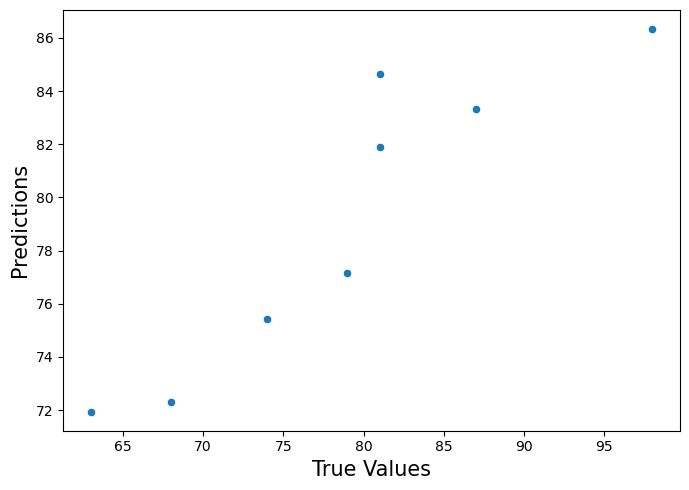





True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000) :


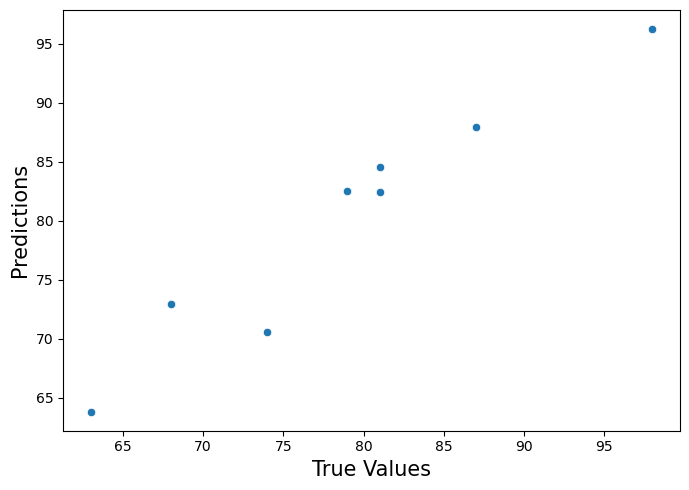





True Values Vs Predicted Value plot Ridge(alpha=0.01) :


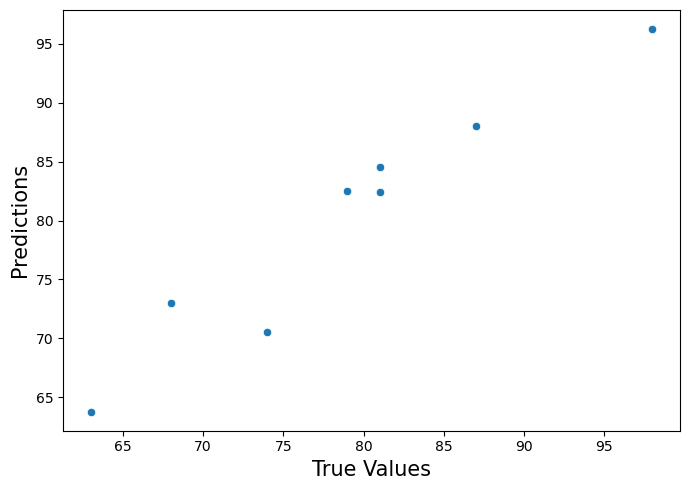





True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


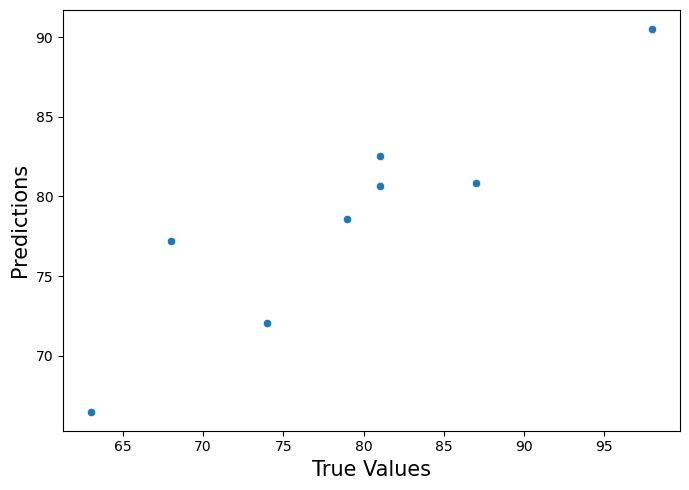





True Values Vs Predicted Value plot DecisionTreeRegressor() :


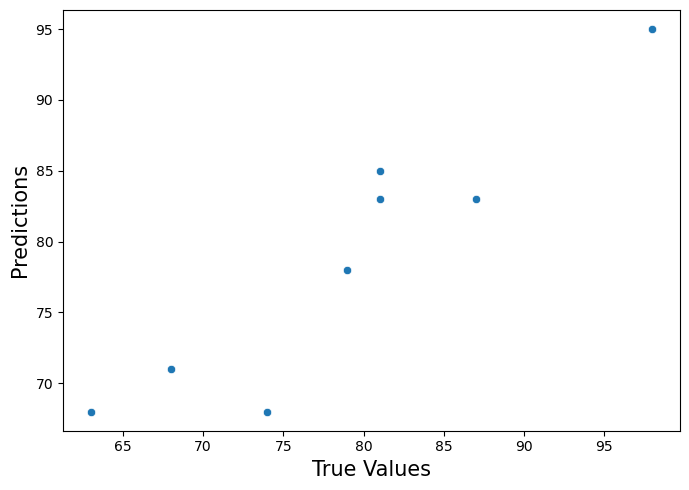





True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


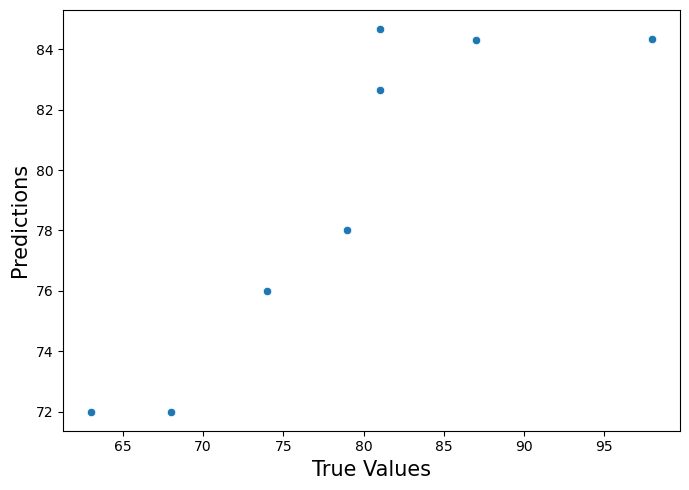





True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


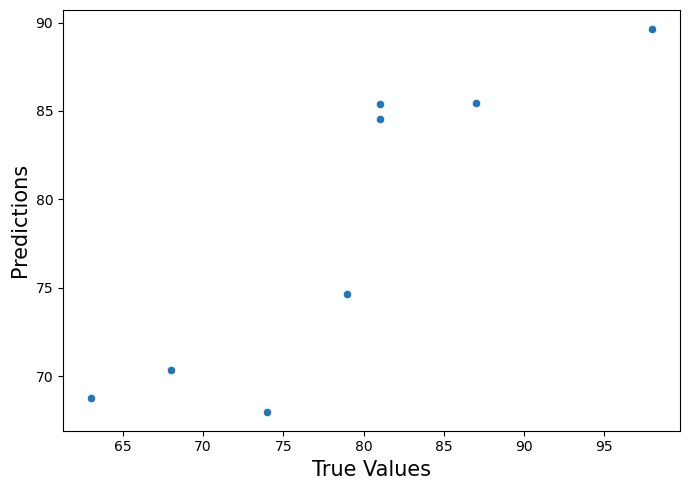





True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


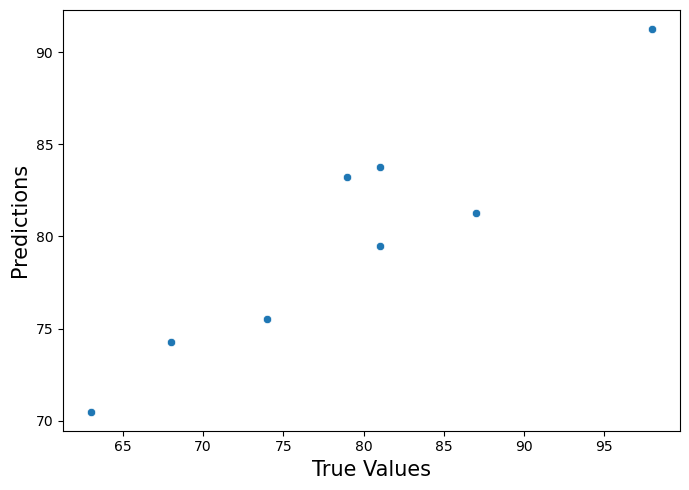





True Values Vs Predicted Value plot XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) :


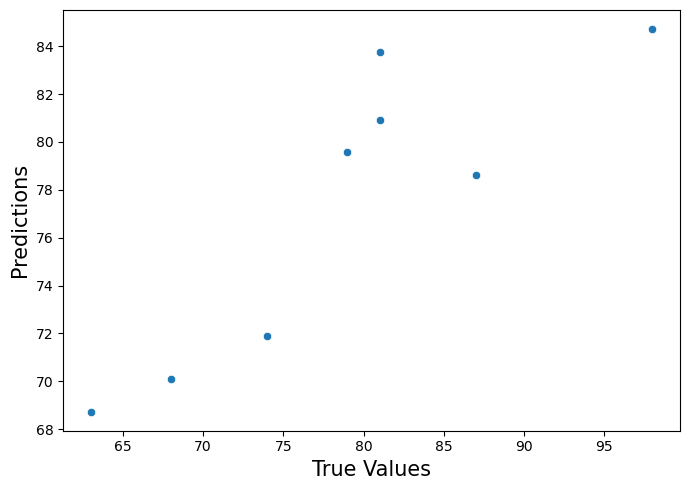

In [59]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn,xgb]

for m in model:
    plt.figure(figsize=(7, 5))
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)
    print('\n')
    print('\033[1m'+'True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    
    
    sns.scatterplot(x=Y_test.round(2), y=y_pred)
    
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    
    print('\n')
    print('===================================================================================================')


### Hyper Parameter Tuning : GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [65]:
GCV = GridSearchCV(Lasso(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [66]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [67]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 29,
 'selection': 'random'}

In [68]:
Final_mod = Lasso(alpha = 1.0, fit_intercept= True,
                                           max_iter = 250, random_state = 29,selection ='random')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 3.3107888387013116
Mean squared error : 13.208108590701865
Root Mean Squared Error: 3.634296161666226


 R2 Score of Final Model :
0.873436300373571




True Values Vs Predicted Value plot :


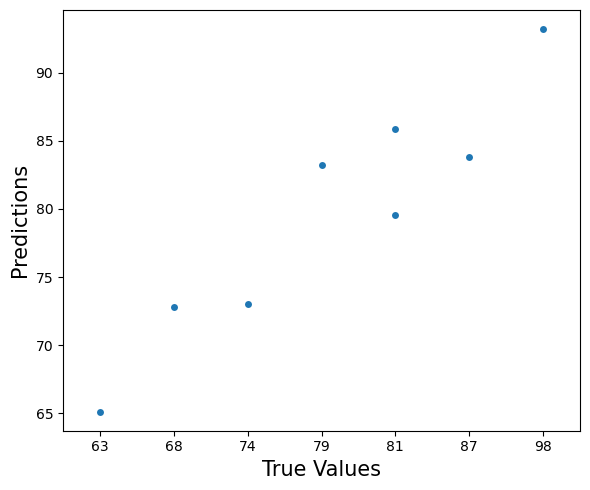

In [70]:
plt.figure(figsize=(6, 5))
y_pred = Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)

print('\033[1m'+'True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()


# SAVING MODEL

In [71]:
import joblib
joblib.dump(Final_mod,'Baseballn_Final.pkl')

['Baseballn_Final.pkl']